In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv("C:\\Users\\jdhan\\Downloads\\bank.csv")
print(df.head(5))

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


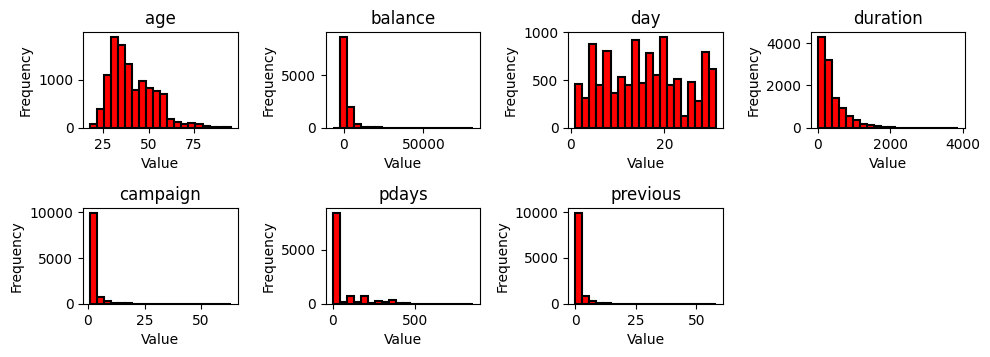

In [4]:
##numerical cloumn univariable check
numerical_columns = ['age','balance','day','duration','campaign','pdays','previous']
plt.figure(figsize=(10,5))
for i , column in enumerate(numerical_columns,1):
    plt.subplot(3,4,i)
    plt.hist(df[column],bins=20,color='red',edgecolor='black',linewidth=1.5)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


C:\Users\jdhan\AppData\Local\Temp\ipykernel_19548\3264631594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=column,palette='viridis')
C:\Users\jdhan\AppData\Local\Temp\ipykernel_19548\3264631594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=column,palette='viridis')
C:\Users\jdhan\AppData\Local\Temp\ipykernel_19548\3264631594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=column,palette='viridis')
C:\Users\jdhan\AppData\Local\Temp\ipykernel_19548\3264631594.py:6: FutureWarning: 

Passing `p

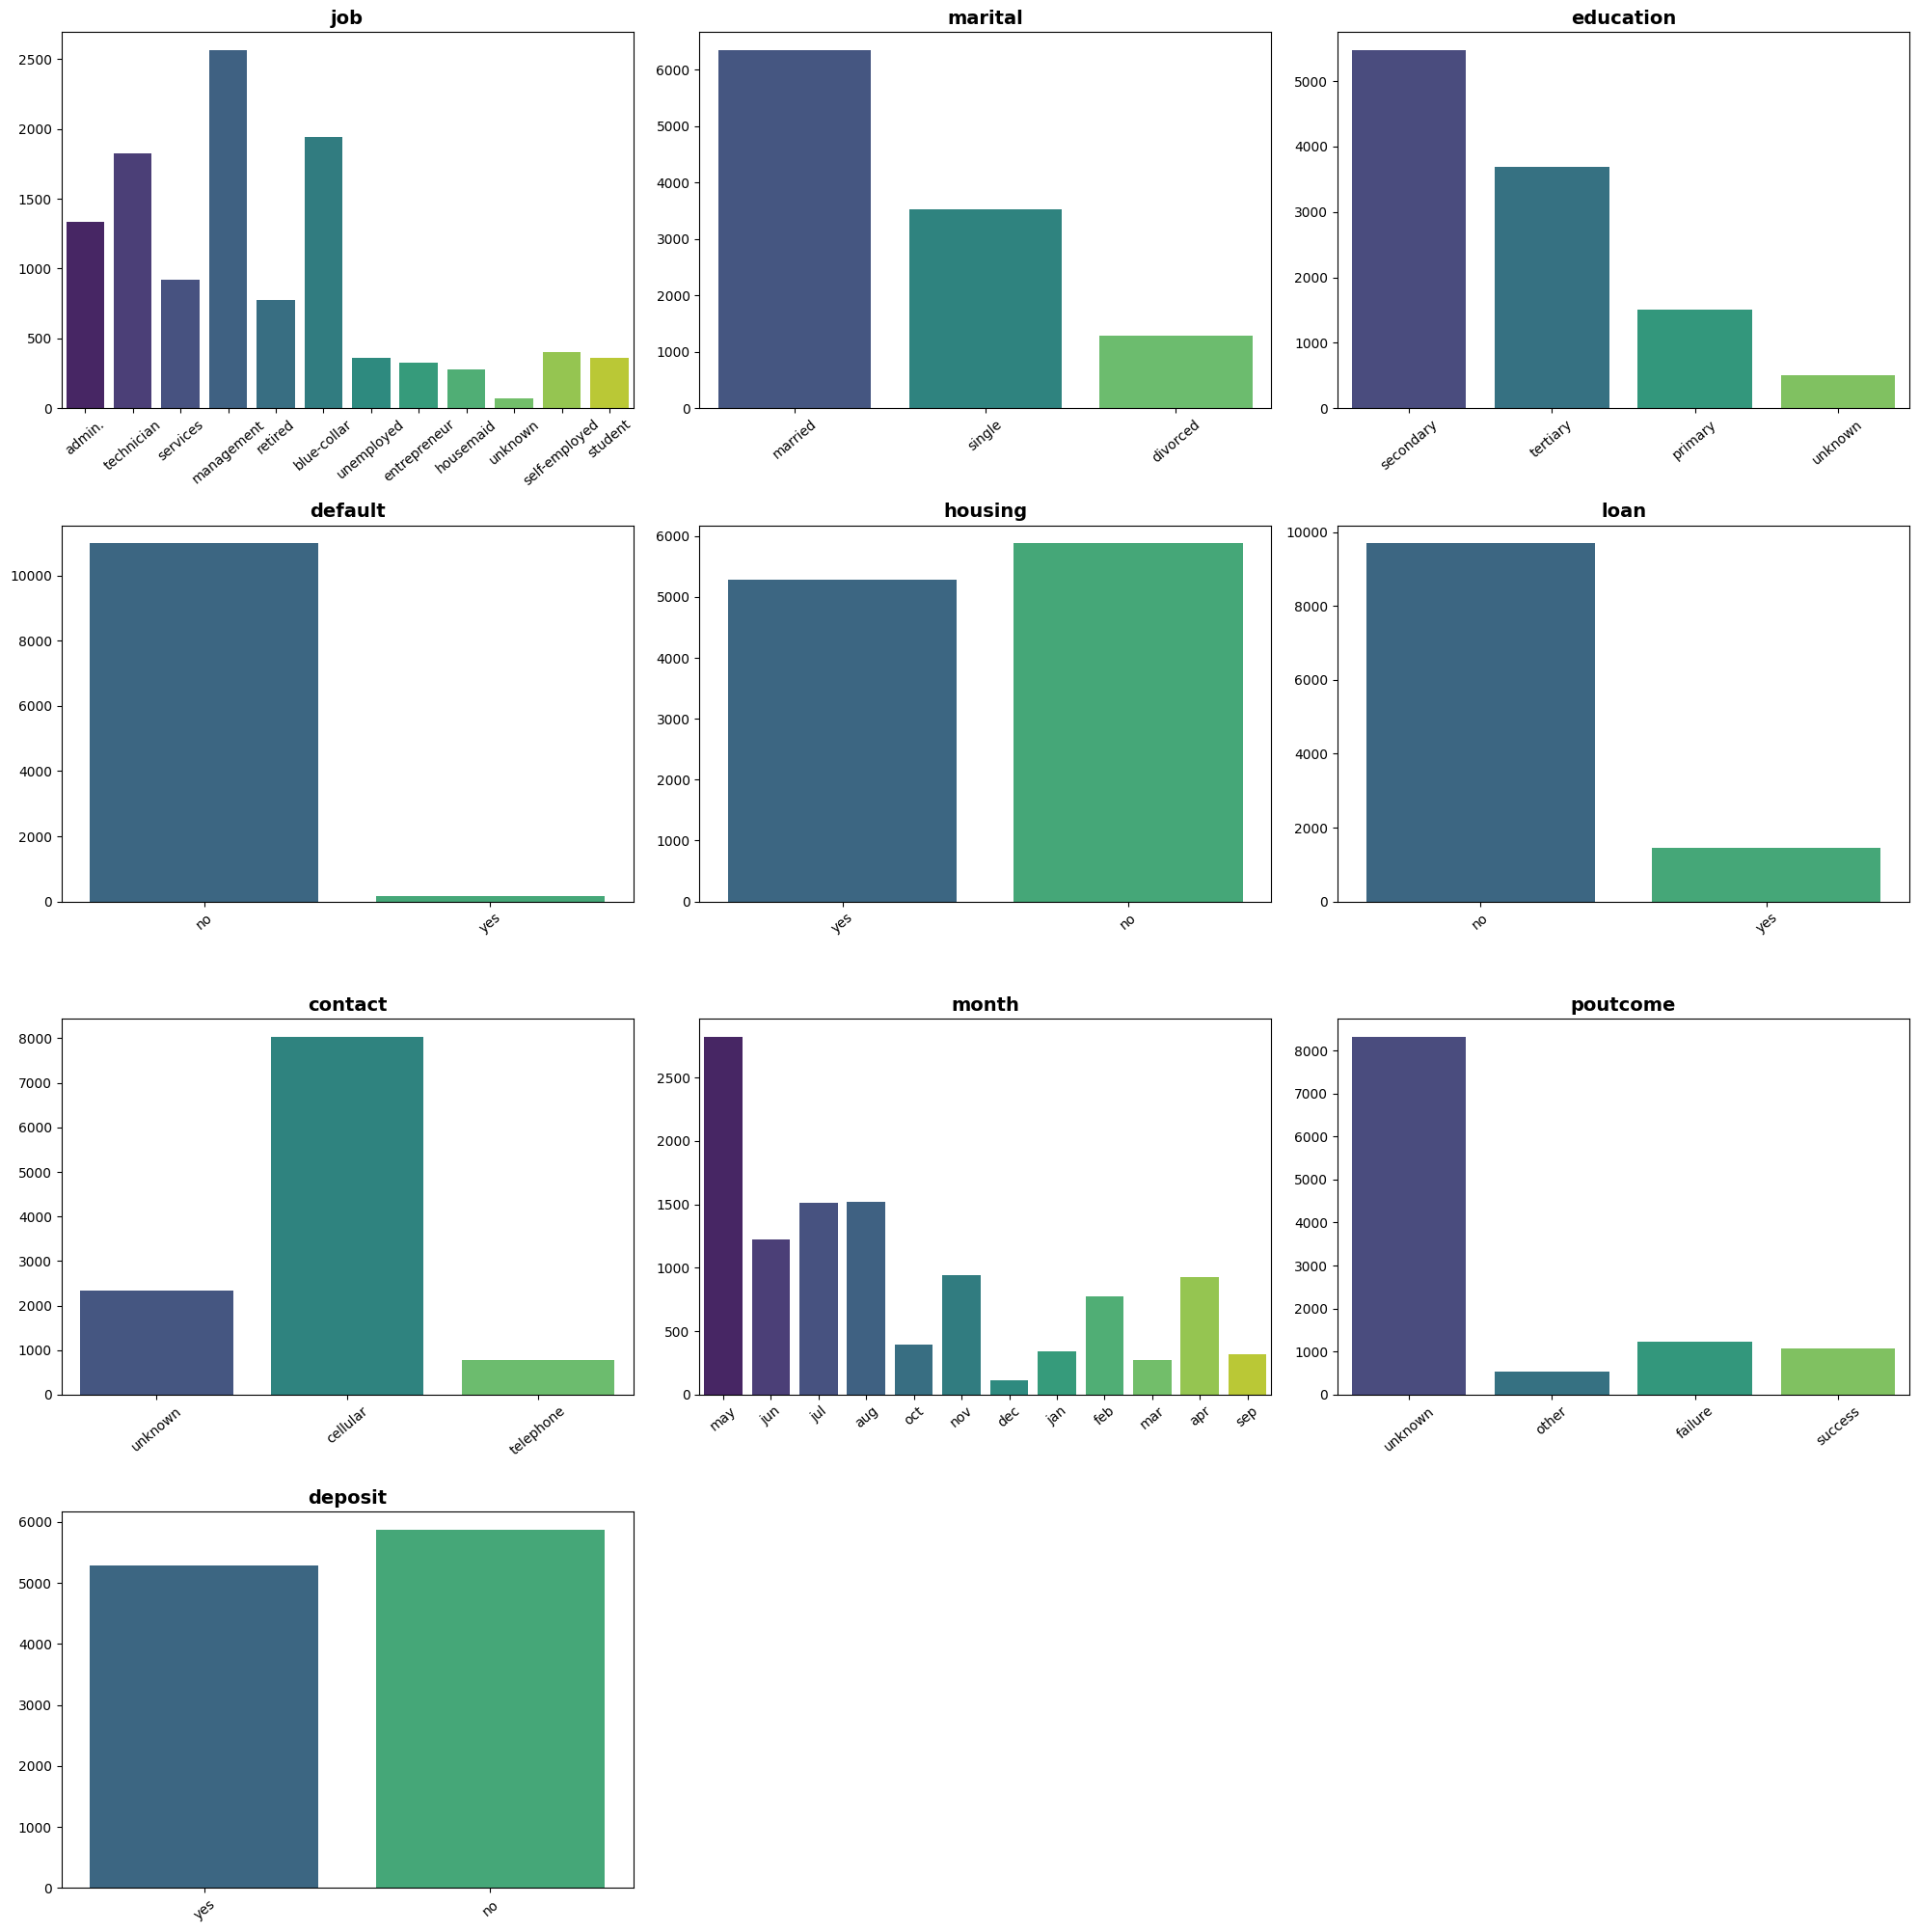

In [6]:
##categorical column
categorical_columns = ['job','marital','education','default','housing','loan','contact','month','poutcome','deposit']
plt.figure(figsize=(20,30))
for i , column in enumerate(categorical_columns,1):
    plt.subplot(6,3,i)
    sns.countplot(data=df,x=column,palette='viridis')
    plt.title(column,fontsize=14,fontweight='bold')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=40)

plt.tight_layout()
plt.show()

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

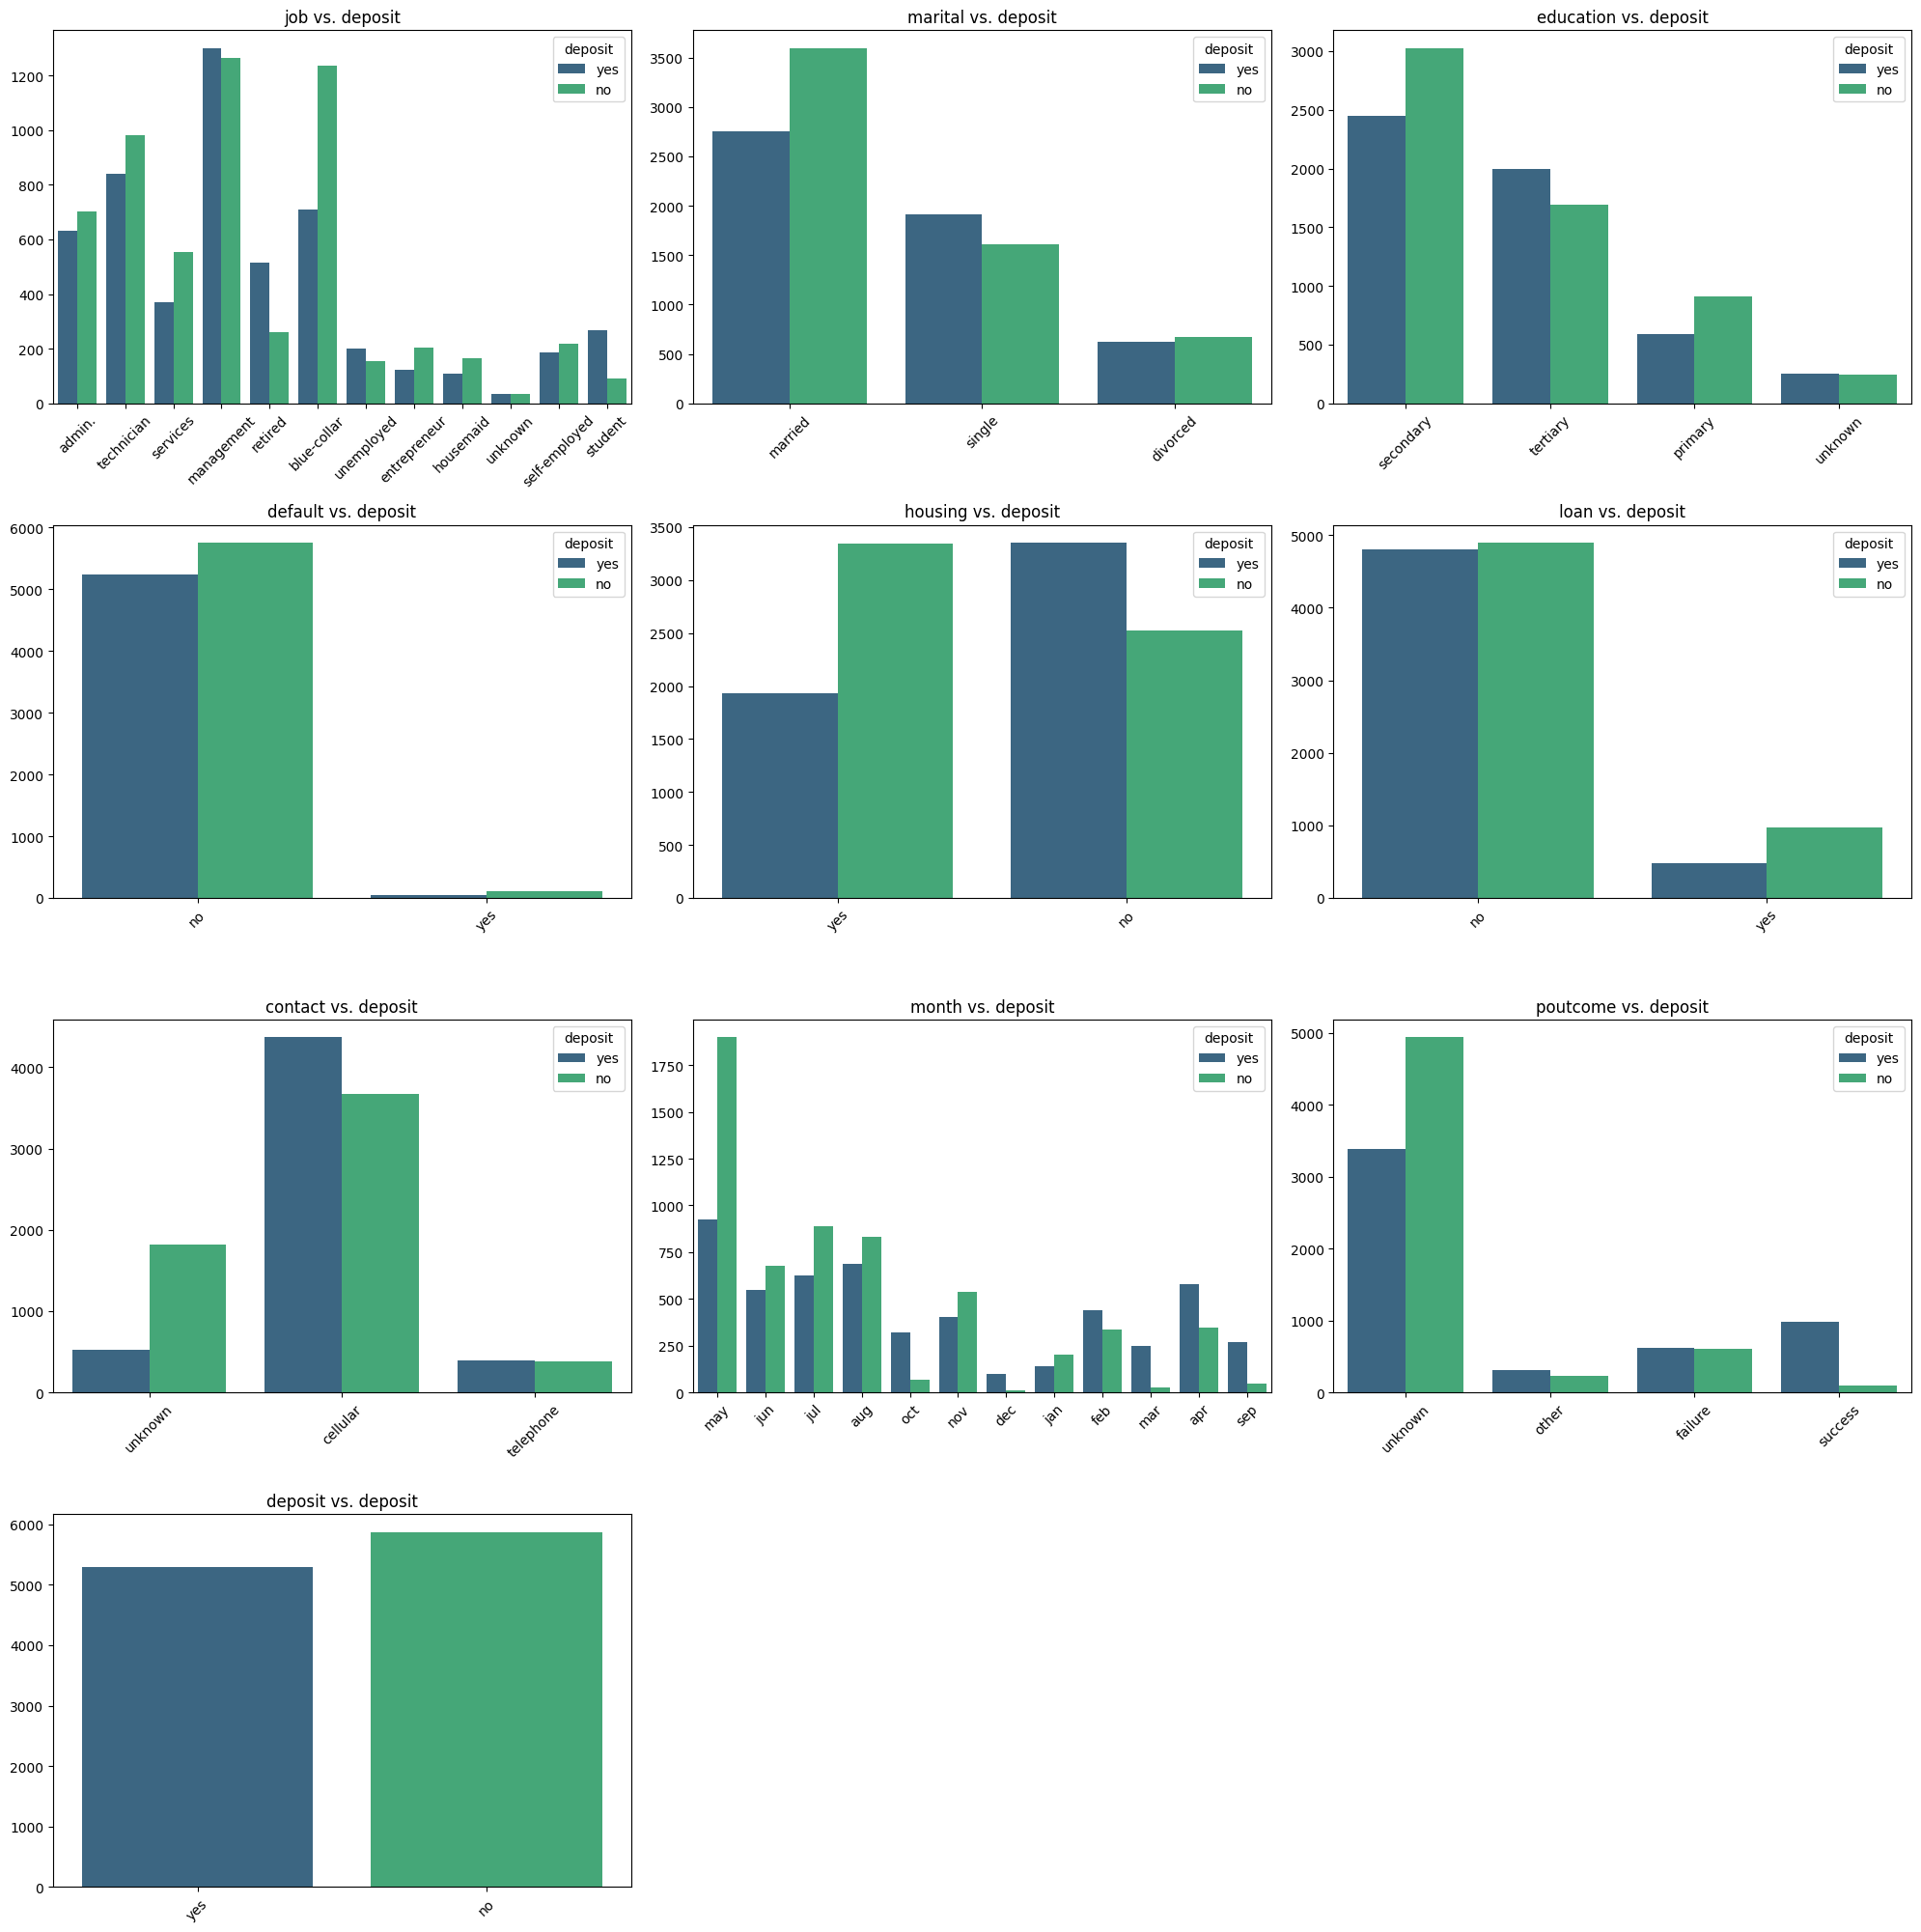

In [8]:
#Bivariable check

#categorical
plt.figure(figsize=(20,30))
for i , column in enumerate(categorical_columns, 1):
    plt.subplot(6,3,i)
    sns.countplot(data=df,x=column,hue='deposit',palette='viridis')
    plt.title(f'{column} vs. deposit')
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

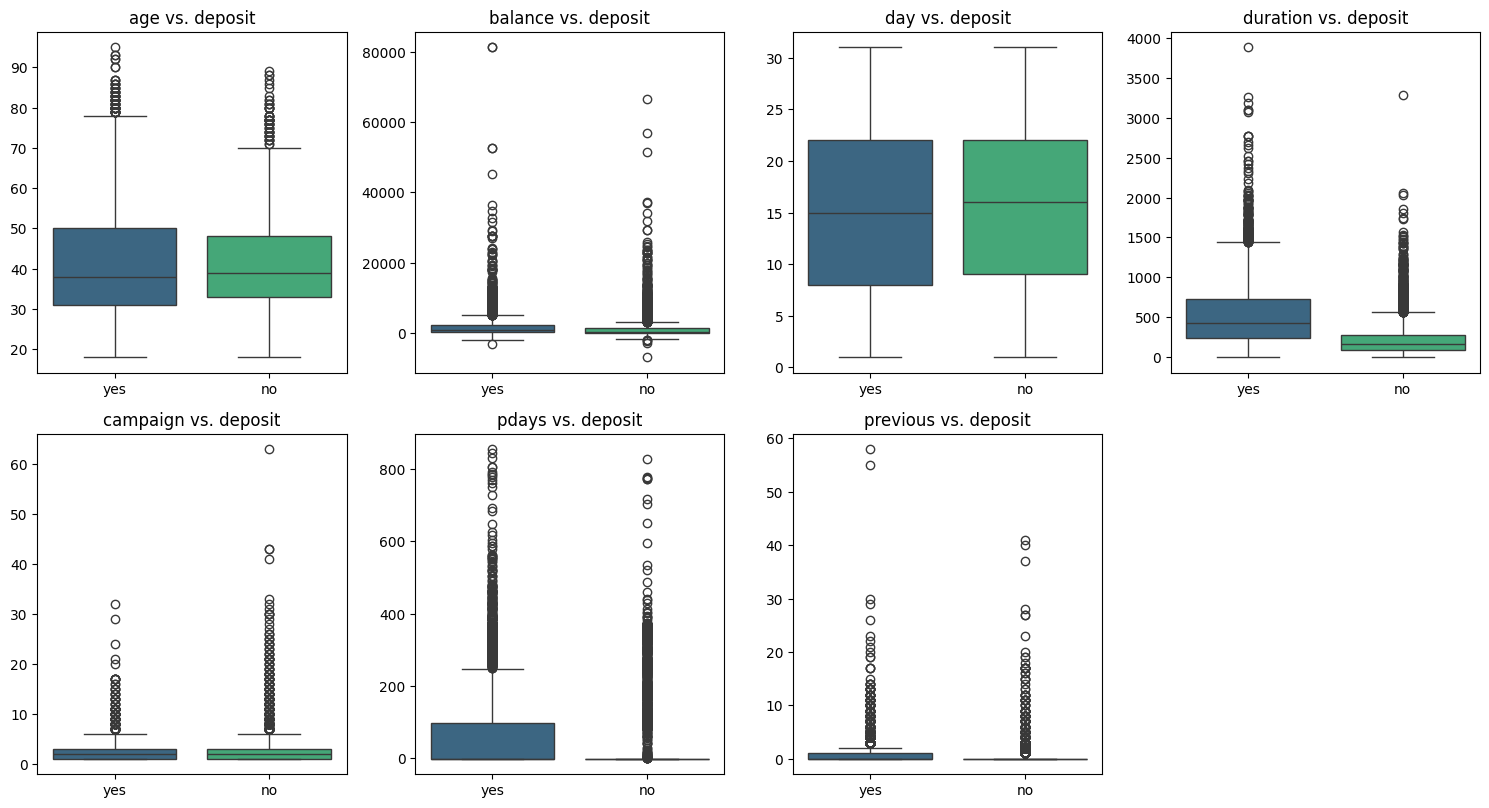

In [9]:
#numerical
plt.figure(figsize=(15,20))
for i ,column in enumerate(numerical_columns,1):
    plt.subplot(5,4,i)
    sns.boxplot(data= df,x='deposit',y=column,hue='deposit',palette='viridis')
    plt.title(f'{column} vs. deposit')
    plt.xlabel(None)
    plt.ylabel(None)

plt.tight_layout()
plt.show()

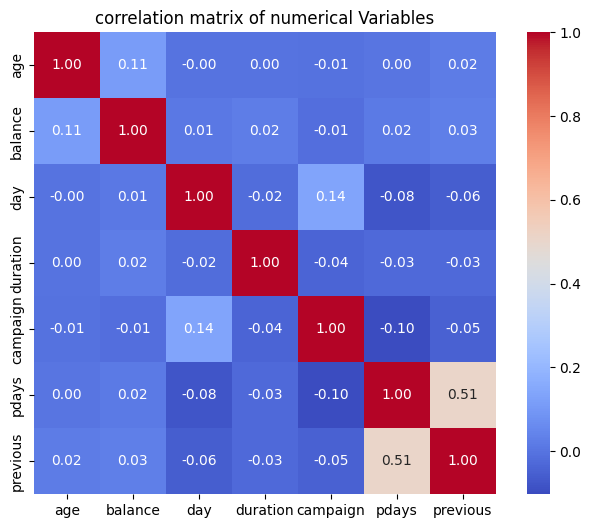

In [10]:
#correlation
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",square=True)
plt.title('correlation matrix of numerical Variables')
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [12]:
variables_to_remove = ['contact','month','poutcome']
#drop
df_filtered = df.drop(variables_to_remove, axis=1)
df_filtered.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit'],
      dtype='object')

In [13]:
df_filtered['marital'].value_counts()

marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

In [14]:
df_filtered['housing'].value_counts()

housing
no     5881
yes    5281
Name: count, dtype: int64

In [15]:
df_filtered['education'].value_counts()

education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

In [16]:
df_filtered['age'].value_counts()

age
31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: count, Length: 76, dtype: int64

In [17]:
num_bins=5
df_filtered['age_group'] = pd.cut(df_filtered['age'],bins=num_bins,labels=[f'Group {i+1}'
                                                                          for i in range(num_bins)])
df_filtered['age_group'].value_counts()

age_group
Group 2    4812
Group 1    3444
Group 3    2481
Group 4     353
Group 5      72
Name: count, dtype: int64

In [18]:
print("Age Group Boundaries:")
print(df_filtered.groupby('age_group')['age'].min())
print(df_filtered.groupby('age_group')['age'].max())

Age Group Boundaries:
age_group
Group 1    18
Group 2    34
Group 3    49
Group 4    65
Group 5    80
Name: age, dtype: int64
age_group
Group 1    33
Group 2    48
Group 3    64
Group 4    79
Group 5    95
Name: age, dtype: int64


C:\Users\jdhan\AppData\Local\Temp\ipykernel_19548\1705225748.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_filtered.groupby('age_group')['age'].min())
C:\Users\jdhan\AppData\Local\Temp\ipykernel_19548\1705225748.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_filtered.groupby('age_group')['age'].max())


In [19]:
df_filtered = df_filtered.drop(columns=['day'])
print(df_filtered.head())

   age         job  marital  education default  balance housing loan  \
0   59      admin.  married  secondary      no     2343     yes   no   
1   56      admin.  married  secondary      no       45      no   no   
2   41  technician  married  secondary      no     1270     yes   no   
3   55    services  married  secondary      no     2476     yes   no   
4   54      admin.  married   tertiary      no      184      no   no   

   duration  campaign  pdays  previous deposit age_group  
0      1042         1     -1         0     yes   Group 3  
1      1467         1     -1         0     yes   Group 3  
2      1389         1     -1         0     yes   Group 2  
3       579         1     -1         0     yes   Group 3  
4       673         2     -1         0     yes   Group 3  


In [20]:
cat_columns = ['job','marital','education','default','housing','loan','deposit','age_group']

#initialize LabeEncoder
label_encoder = LabelEncoder()

#encode each categorical column
for column in cat_columns:
    df_filtered[column] = label_encoder.fit_transform(df_filtered[column])

df_filtered.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,age_group
0,59,0,1,1,0,2343,1,0,1042,1,-1,0,1,2
1,56,0,1,1,0,45,0,0,1467,1,-1,0,1,2
2,41,9,1,1,0,1270,1,0,1389,1,-1,0,1,1
3,55,7,1,1,0,2476,1,0,579,1,-1,0,1,2
4,54,0,1,2,0,184,0,0,673,2,-1,0,1,2


In [21]:
#Numerical Treatment

##feature scaling
num_columns = ['balance','duration','campaign','pdays','previous']

#initialise Standardscaler
Scaler = StandardScaler()
for column in num_columns:
    df_filtered[num_columns] = Scaler.fit_transform(df_filtered[num_columns])
df_filtered.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,deposit,age_group
0,59,0,1,1,0,0.252525,1,0,1.930226,-0.554168,-0.481184,-0.36326,1,2
1,56,0,1,1,0,-0.459974,0,0,3.154612,-0.554168,-0.481184,-0.36326,1,2
2,41,9,1,1,0,-0.080160,1,0,2.929901,-0.554168,-0.481184,-0.36326,1,1
3,55,7,1,1,0,0.293762,1,0,0.596366,-0.554168,-0.481184,-0.36326,1,2
4,54,0,1,2,0,-0.416876,0,0,0.867171,-0.186785,-0.481184,-0.36326,1,2


In [22]:
## ml model
#split data

X = df_filtered.drop(columns=['deposit'])
y = df_filtered['deposit']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

print("Traing set shape", X_train.shape,y_train.shape)
print("test set shape", X_test.shape, y_test.shape)

Traing set shape (8929, 13) (8929,)
test set shape (2233, 13) (2233,)


## Logistic Regression

Accuracy is: 0.7733990147783252


C:\Users\jdhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


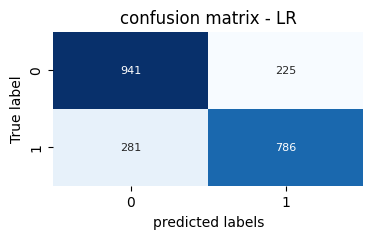

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)

model.fit(X_train, y_train)#train model
y_pred_lr = model.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

Accuracy is: 0.7357814599193909


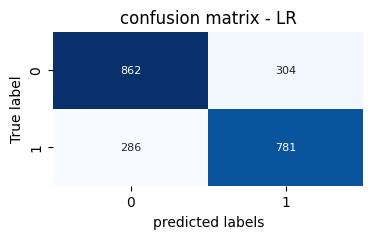

In [46]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)

model_dt.fit(X_train, y_train)#train model
y_pred_dt = model_dt.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_dt)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_dt)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

Accuracy is: 0.799373040752351


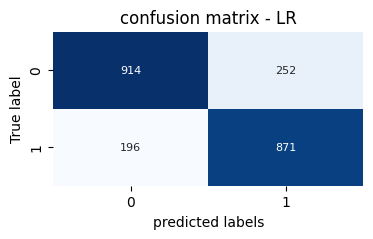

In [47]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)

model_rf.fit(X_train, y_train)#train model
y_pred_rf = model_rf.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

Accuracy is: 0.7881773399014779


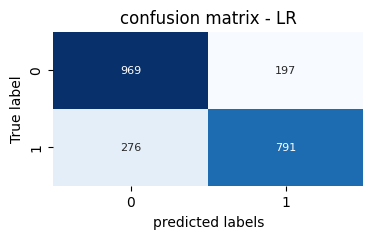

In [45]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train, y_train)#train model
y_pred_svm = model_svm.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

Accuracy is: 0.8087774294670846


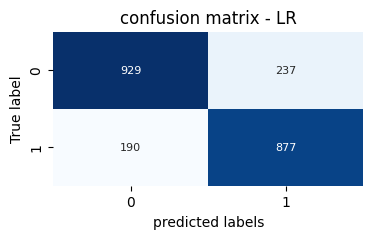

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

model_gb.fit(X_train, y_train)#train model
y_pred_gb = model_gb.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_gb)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

Accuracy is: 0.7344379758172862


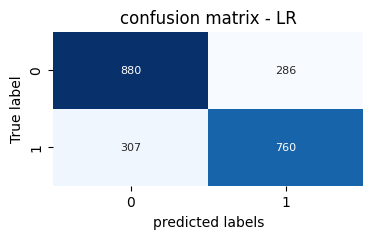

In [49]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)

model_knn.fit(X_train, y_train)#train model
y_pred_knn = model_knn.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

Accuracy is: 0.7662337662337663


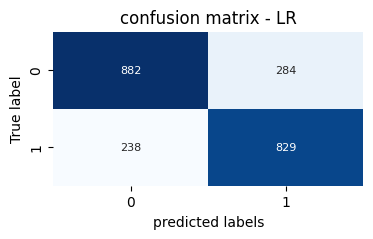

In [50]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()

model_nb.fit(X_train, y_train)#train model
y_pred_nb = model_nb.predict(X_test)#test predictions

#model accuracy
accuracy = accuracy_score(y_test, y_pred_nb)
print("Accuracy is:", accuracy)

#confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred_nb)
plt.figure(figsize=(4,2))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False,annot_kws={"fontsize":8})
plt.title("confusion matrix - LR")
plt.xlabel('predicted labels')
plt.ylabel('True label')
plt.show()

In [51]:
#define evalution function:
def evaluate_model(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision = precision_score(y_true,y_pred, pos_label=1)
    recall = recall_score(y_true,y_pred,pos_label=1)
    f1 = f1_score(y_true,y_pred,pos_label=1)
    return accuracy,precision,recall,f1

#evaluate each classifier
classifiers = {
    "Logistic regression":y_pred_lr,
    "Decision Tree":y_pred_dt,
    "Random Forest":y_pred_rf,
    "SVM":y_pred_svm,
    "KNN":y_pred_knn,
    "Naive Bayes":y_pred_nb,
    "Gradient Boosting":y_pred_gb
}

for clf_name,y_pred in classifiers.items():
    accuracy,precision,recall,f1 = evaluate_model(y_test,y_pred)
    print(f"{clf_name}:")
    print(f"  accuracy:{accuracy:.4f}")
    print(f"  precision:{precision:.4f}")
    print(f"  recall:{recall:.4f}")
    print(f"  F1 score:{f1:.4f}")

Logistic regression:
  accuracy:0.7734
  precision:0.7774
  recall:0.7366
  F1 score:0.7565
Decision Tree:
  accuracy:0.7358
  precision:0.7198
  recall:0.7320
  F1 score:0.7258
Random Forest:
  accuracy:0.7994
  precision:0.7756
  recall:0.8163
  F1 score:0.7954
SVM:
  accuracy:0.7882
  precision:0.8006
  recall:0.7413
  F1 score:0.7698
KNN:
  accuracy:0.7344
  precision:0.7266
  recall:0.7123
  F1 score:0.7194
Naive Bayes:
  accuracy:0.7662
  precision:0.7448
  recall:0.7769
  F1 score:0.7606
Gradient Boosting:
  accuracy:0.8088
  precision:0.7873
  recall:0.8219
  F1 score:0.8042


## Feature Importance


In [58]:
#GB

feature_importances_gb = model_gb.feature_importances_

#Display feature importance
feature_importance_df_gb = pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances_gb})
feature_impoprtance_df_gb = feature_importance_df_gb.sort_values(by='Importance',ascending=False)
print("Gradient Boosting Feature Importance:")
print(feature_importance_df_gb)

Gradient Boosting Feature Importance:
      Feature  Importance
0         age    0.055816
1         job    0.005095
2     marital    0.000995
3   education    0.011090
4     default    0.000000
5     balance    0.029440
6     housing    0.092777
7        loan    0.005943
8    duration    0.620014
9    campaign    0.015659
10      pdays    0.112578
11   previous    0.050328
12  age_group    0.000266


In [59]:
#RF

feature_importances_rf = model_rf.feature_importances_

#Display feature importance
feature_importance_df_rf = pd.DataFrame({'Feature':X_train.columns,'Importance':feature_importances_rf})
feature_impoprtance_df_rf = feature_importance_df_rf.sort_values(by='Importance',ascending=False)
print("Gradient Boosting Feature Importance:")
print(feature_importance_df_rf)

Gradient Boosting Feature Importance:
      Feature  Importance
0         age    0.110670
1         job    0.055162
2     marital    0.023941
3   education    0.030778
4     default    0.001910
5     balance    0.131842
6     housing    0.039737
7        loan    0.013298
8    duration    0.416594
9    campaign    0.048682
10      pdays    0.066880
11   previous    0.036155
12  age_group    0.024350


## ROC curve form GB and RF

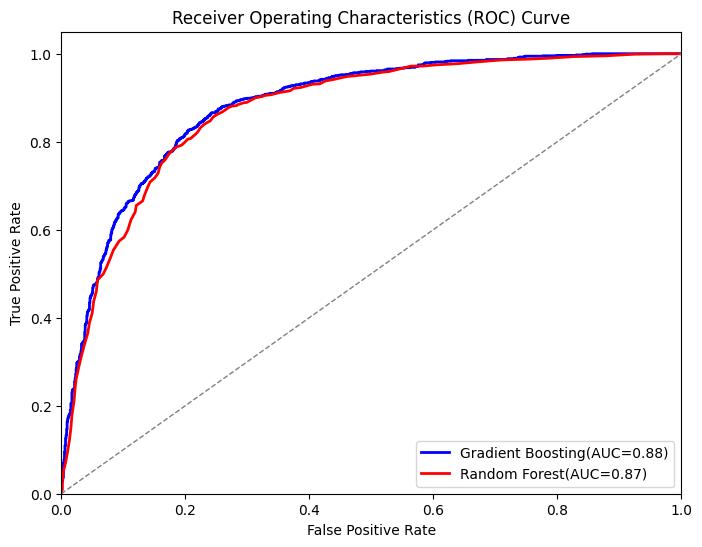

In [65]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

#compute predicted probabilities for GB and RF
y_prob_gb = model_gb.predict_proba(X_test)[:,-1]
y_prob_rf = model_rf.predict_proba(X_test)[:,-1]

#compute roc curve and roc area for GB 
fpr_gb, tpr_gb, _ =roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

#compute roc curve and roc area for GB 
fpr_rf, tpr_rf, _ =roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

#plot ROC curve 
plt.figure(figsize=(8,6))
plt.plot(fpr_gb, tpr_gb, color='blue',lw=2,label=f'Gradient Boosting(AUC={roc_auc_gb:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red',lw=2,label=f'Random Forest(AUC={roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],color='gray',lw=1,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics (ROC) Curve')
plt.legend(loc='lower right')
plt.show()